In [1]:
import pandas as pd
import csv
import math
import numpy as np

First, I read the **duration column** in the **csv file** and put it into a list:

In [55]:
data = pd.read_csv("/Users/Nika/Desktop/ted_main.csv")
duration = pd.DataFrame(data, columns=["duration"])
mask = np.random.rand(len(duration)) <= 0.8
xi = duration[mask]
x = duration[~mask]

x = x.values.tolist()
x = np.reshape(x,(1,len(x)))
x_values = []
for i in range(len(x[0])):
    x_values.append(x[0][i])
x_values.sort()

xi = xi.values.tolist()
xi = np.reshape(xi,(1,len(xi)))
xi_values = []
for i in range(len(xi[0])):
    xi_values.append(xi[0][i])
xi_values.sort()


Then, I define a function to calculate the **density score** with the gaussian kernel:

In [61]:
def density_score (x, data, h):
    n = len(data)
    coefficient = 1/((math.sqrt(2 * math.pi)) * h)
    sum = 0
    for i in range (n):
        xi = data[i]
        exponent = math.exp(-0.5 * ((x - xi)/h)**2)
        sum+= (1 / h) * coefficient * exponent
    return ( (1/n) * sum)


I calculate the density score for all our data and find the **distribution** as below:

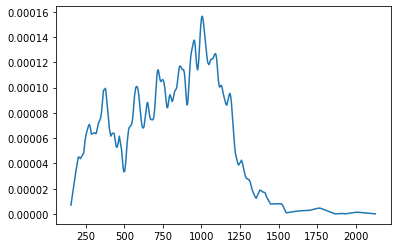

In [64]:
import numpy as np
import matplotlib.pyplot as plt

h = 10
distribution = []
for i in range(len(x_values)):
    distribution.append(density_score(x_values[i], xi_values, h))
plt.plot(x_values,distribution)


Now I calculate the distribution with **different window sizes**:


h = 20:

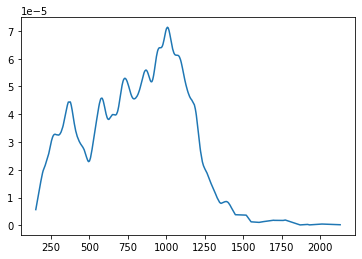

In [65]:
h = 20
distribution = []
for i in range(len(x_values)):
    distribution.append(density_score(x_values[i], xi_values, h))
plt.plot(x_values,distribution)

h = 50:

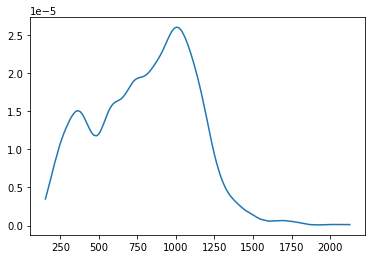

In [66]:
h = 50
distribution = []
for i in range(len(x_values)):
    distribution.append(density_score(x_values[i], xi_values, h))
plt.plot(x_values,distribution)

h = 100:

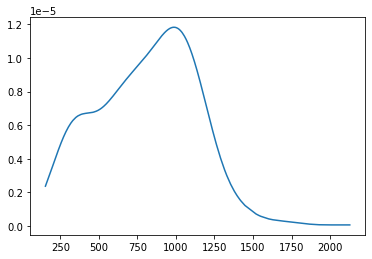

In [67]:
h = 100
distribution = []
for i in range(len(x_values)):
    distribution.append(density_score(x_values[i], xi_values, h))
plt.plot(x_values,distribution)

As it can be seen, the distribution becomes **smoother** by increasing the window size.